In [ ]:
# import necessary packages
import numpy as np
import scipy.special as ss
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.constants import * 
from matplotlib.patches import Circle
from scipy.integrate import quad,dblquad
from ipywidgets import interactive
from scipy.special import fresnel 
from mpl_toolkits.mplot3d import axes3d

# **1. np.where(): How to deal with singular points?**

Plot $$sinc(x)=\frac{sin(\pi x)}{\pi x}$$ Explicitly handle the case where x=0. 

In [ ]:
def sinc(x):
  arg=np.pi*np.where(x==0,1e-15,x)
  # arg=np.pi*x
  y=np.sin(arg)/arg
  return y

In [ ]:
x=np.linspace(-5,5,200)

You can see that there was no divide by zero error. 

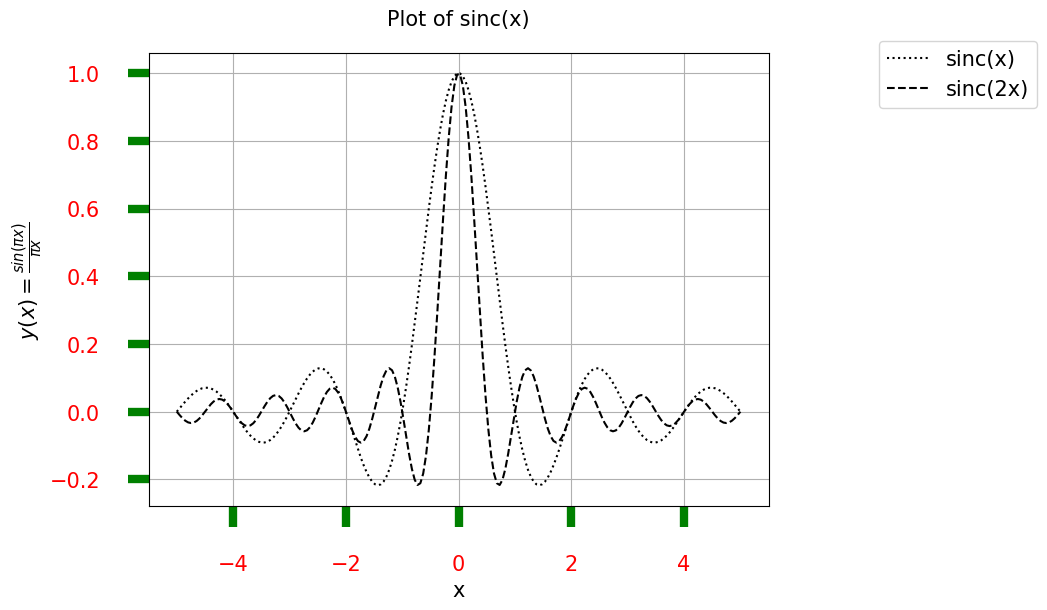

In [ ]:
fig,ax=plt.subplots(figsize=(8,6),dpi=100)

ax.plot(x,sinc(x),label='sinc(x)',c='black',ls=':')
#ax.plot(x,sinc(x),label='sinc(x)',marker='^',c='black',mfc='red',mew=3.0,mec='blue',ms=10,ls='-.')
ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('$y(x)=\\frac{sin(\pi x)}{\pi x}$',fontsize=15)
# ax.set_title('Plot of sinc(x)',fontsize=15)

ax.plot(x,sinc(2*x),label='sinc(2x)',c='black',ls='--')
#ax.plot(x,sinc(2*x),label='sinc(2x)',marker='v',c='black')
ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('$y(x)=\\frac{sin(\pi x)}{\pi x}$',fontsize=15)
ax.set_title('Plot of sinc(x)',fontsize=15,pad=20)
ax.legend(fontsize=15)
ax.legend(bbox_to_anchor=(1.45,1.05),loc=1,fontsize=15)
#ax.legend(loc='upper left',fontsize=15)
ax.tick_params(axis='both',labelsize=15,labelcolor='red',color='green',width=6,size=15,pad=20)
#ax.tick_params(axis='both',labelsize=15,labelcolor='blue',color='green',width=4,pad=20,size=15)
ax.grid()

# **2. Spirals**





## **Cornu's Spiral: Use packages as much as you can**
This is created out of Fresnel integrals with usage in optics and are given by 
$$C(l)=\int\limits_{0}^{l}\cos{\left(\frac{\pi t^2}{2}\right)}dt$$ and 
$$S(l)=\int\limits_{0}^{l}\sin{\left(\frac{\pi t^2}{2}\right)}dt$$
The parametric curve $(x(l),y(l))=(C(l),S(l))$ is the Cornu's spiral. Use scipy package to plot this curve. 

Text(0, 0.5, 'y')

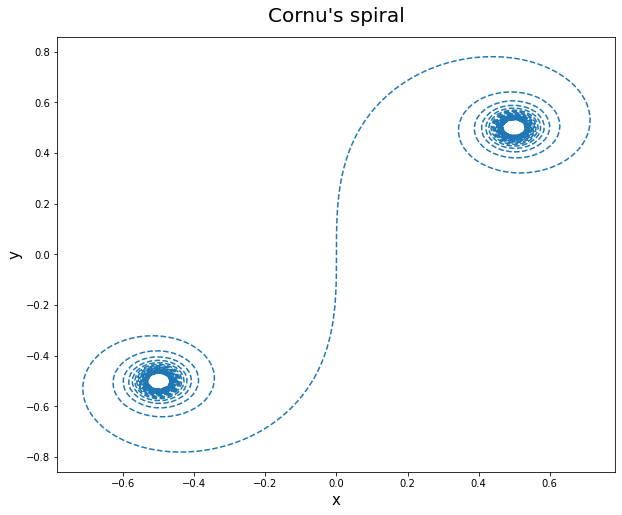

In [ ]:
l=np.linspace(-10,10,int(1e3))
plt.figure(figsize=(10,8))
C,S=fresnel(l)
plt.plot(C,S,ls='--')
plt.title("Cornu's spiral",fontsize=20,pad=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)

**H1**: Prove that the angular acceleration on this curve is constant. 

## **Lituus Spiral: Interactive Polar Plot**

In [ ]:
theta=np.linspace(0.1,12*np.pi,100)
def radial(a):
  return a/np.sqrt(theta)

In [ ]:
def interactive_plot(a=2):
  r=radial(a)
  plt.figure(figsize=(10,8))
  plt.polar(theta,r,c='red')
  plt.title('Plot of a Lituus Spiral',fontsize=20,pad=20)

interactive(interactive_plot,a=(1,10,1))


interactive(children=(IntSlider(value=2, description='a', max=10, min=1), Output()), _dom_classes=('widget-int…

**H2**: Prove that the magnetic field at the centre of the Lituus Spiral is $\frac{\mu_0I}{3a}\sqrt{2\pi}$. See Griffiths' Electrodynamics Book Question 5.51

# **3. Bowditch Curves/Lissajous Figures: Adding Subplots**

Consider two sinusoisal motions
$$y_1(t)=\sin{(t)}, y_2(t)=\sin{(nt+\phi)}$$ where n is an integer and $\phi$ is some offset. Make 4 subplots for various values of n and $\phi$, but using only one for loop. 

Text(0.5, 0.98, 'Lissajous Figures')

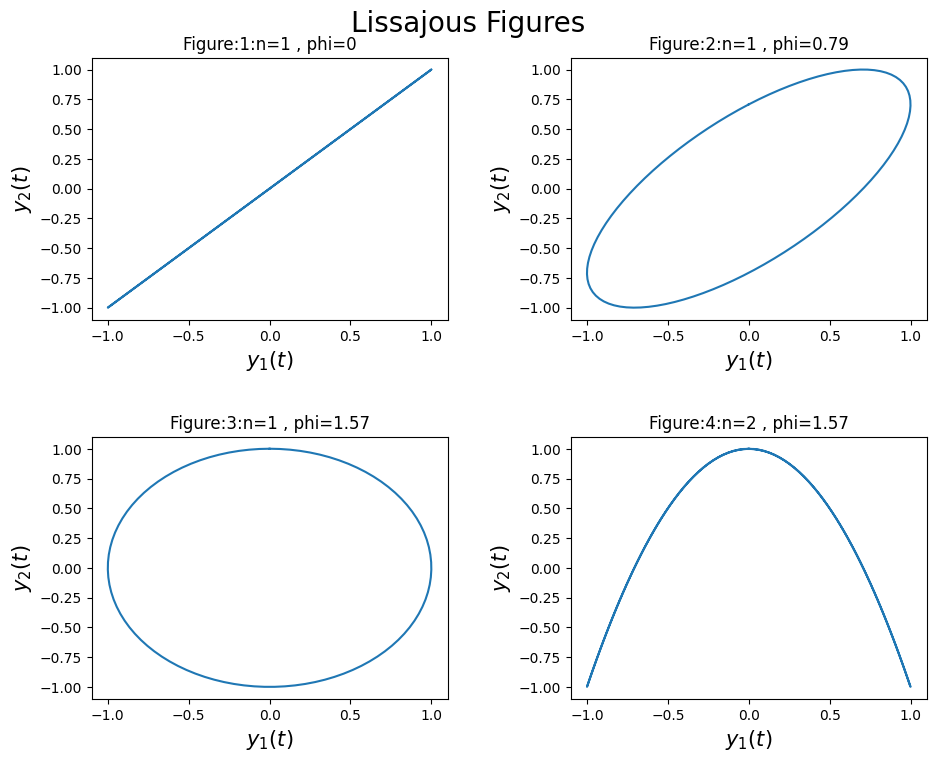

In [ ]:
t=np.linspace(0,2*np.pi,100)
n=[1,1,1,2]
phi=[0,np.pi/4,np.pi/2,np.pi/2]
fig=plt.figure(figsize=(10,8),dpi=100)

for i in range(len(n)):
  ax=fig.add_subplot(2,2,i+1)
  ax.plot(np.sin(t),np.sin(n[i]*t+phi[i]))
  ax.set_xlabel('$y_1(t)$',fontsize=15)
  ax.set_ylabel('$y_2(t)$',fontsize=15)
  ax.set_title('Figure:'+str(i+1)+':'+'n='+ str(n[i])+ ' , phi=' + str(round(phi[i],2)))
fig.tight_layout(pad=3.0)
plt.suptitle('Lissajous Figures',fontsize=20)

# **4. Fields in 2D**

100


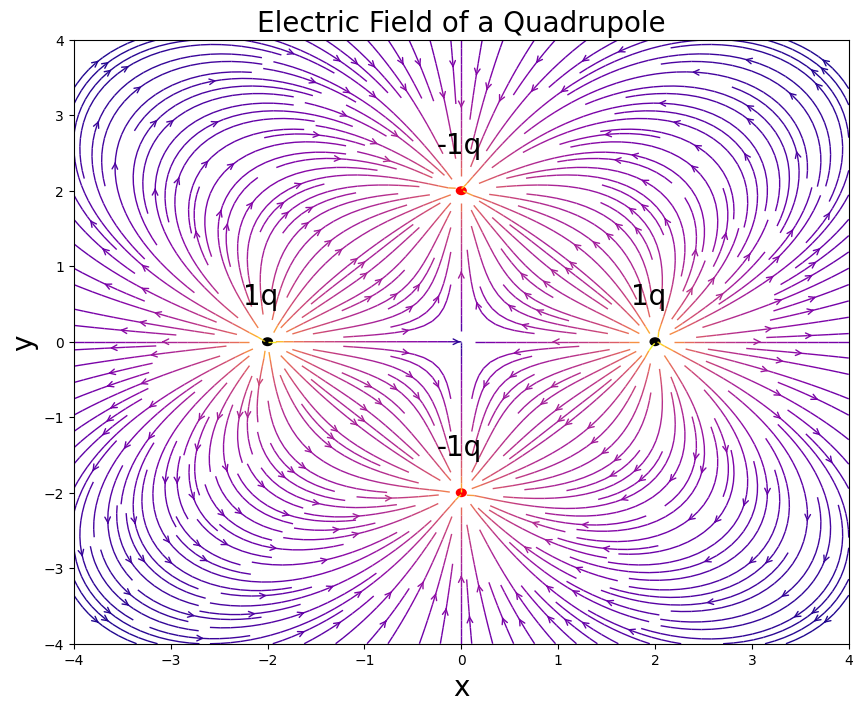

In [ ]:
total=100
figure, ax = plt.subplots(figsize=(10,8),dpi=100)
x=np.linspace(-4,4,total)
y=np.linspace(-4,4,total)
X,Y=np.meshgrid(x,y)

k=1/(4*np.pi*epsilon_0)
Ex=[[0]*total]*total
Ey=deepcopy(Ex)

qpos={(-2,0): 1, (2,0): 1, (0,-2): -1, (0,2): -1}
for charge_loc,charge in qpos.items():
  if(charge>0):
    ax.add_artist(Circle(charge_loc,abs(charge)/20,color='black'))
  else:
    ax.add_artist(Circle(charge_loc,abs(charge)/20,color='red'))
  ax.text(charge_loc[0]-0.25,charge_loc[1]+0.5,s=str(charge)+'q',fontsize=20)

for charge_loc,charge in qpos.items():
  charge_xloc,charge_yloc=charge_loc
  R=np.sqrt((X-charge_xloc)**2+(Y-charge_yloc)**2)
  Ex+=charge*(X-charge_xloc)/R**3
  Ey+=charge*(Y-charge_yloc)/R**3

color=np.log((np.sqrt(Ex**2+Ey**2)))

ax.streamplot(X, Y, Ex, Ey, color=color,linewidth=1,cmap=plt.cm.plasma,density=2.5, arrowstyle='->', arrowsize=1)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Electric Field of a Quadrupole', fontsize=20)
print(len(color))

**H3**: Find out how is the color scheme working here.

**H4:** Plot the electric field lines due to an octopole distribution. Distribute the 8 charges with alternating signs on a circle. 
Do not hardcore the charge locations. Use a for loop. 

## **Electric Field due to a Parallel Plate Capacitor**

Text(0.5, 1.0, 'Electric Field of a Parallel Plate Capacitor')

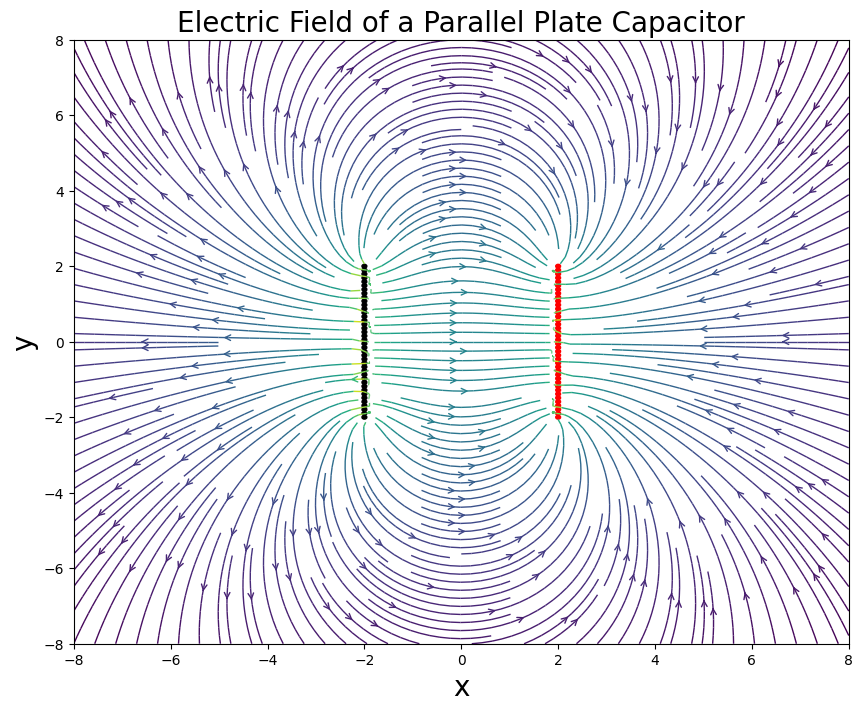

In [ ]:
qpos={}
total_num_charges=40
int_dis=1e-2
for i in range(total_num_charges):
  qpos[(-2,4*i/(total_num_charges-1)-2)]=1
  qpos[(2,4*i/(total_num_charges-1)-2)]=-1

total=100
figure, ax = plt.subplots(figsize=(10,8),dpi=100)
x=np.linspace(-8,8,total)
y=np.linspace(-8,8,total)
X,Y=np.meshgrid(x,y)

k=1/(4*np.pi*epsilon_0)
Ex=[[0]*total]*total
Ey=deepcopy(Ex)

# qpos={1: (-2,0), 5: (2,0), -1: (0,-2), -5: (0,2)}
for charge_loc,charge in qpos.items():
  if(charge>0):
    ax.add_artist(Circle(charge_loc,abs(charge)/20,color='black'))
  else:
    ax.add_artist(Circle(charge_loc,abs(charge)/20,color='red'))

for charge_loc,charge in qpos.items():
  charge_xloc,charge_yloc=charge_loc
  R=np.sqrt((X-charge_xloc)**2+(Y-charge_yloc)**2)
  Ex+=charge*(X-charge_xloc)/R**3
  Ey+=charge*(Y-charge_yloc)/R**3
  
color=np.log((np.sqrt(Ex**2+Ey**2)))

ax.streamplot(X, Y, Ex, Ey, color=color,linewidth=1,cmap=plt.cm.viridis,density=2.5, arrowstyle='->', arrowsize=1)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Electric Field of a Parallel Plate Capacitor', fontsize=20)


# **5. Fields in 3D**

Numerically integrate $$I=\int\limits_{-\infty}^{\infty}e^{-ax^2}dx$$
Pass a as an argument. The analytical value of I is 
$$I=\sqrt{\frac{\pi}{a}}$$ Verify your numerical result against various values of a.

In [ ]:
def integrate(x,a):
  return np.exp(-a*x**2)

In [ ]:
a=2
ans=quad(integrate,-np.inf,np.inf,args=(a))[0]
print(ans,np.sqrt(np.pi/a))
#help(quad)

1.2533141373155017 1.2533141373155001


Let's now perform a double integral. We use dblquad. It returns the double (definite) integral of func(y, x) from x = a..b and y = gfun(x)..hfun(x). Perform the integration 
$$I=\int\limits_{0}^{1}\int\limits_{y=0}^{y=x}ay\hspace{2pt}dydx$$

In [ ]:
def integrate(y,x,a):
  return a*y
a=2
ans=dblquad(integrate,0,1,lambda x:0, lambda x:x,args=[a])[0]
print(ans,a/6)


0.33333333333333337 0.3333333333333333


## **Magnetic Field of a Cylindrical Bar Magnet**

Consider a cylinder with its center at the origin of the coordinate system. Conside a disk of infinitesimally small thickness $dz'$. The current in this disc flows in the azimuthal direction with value $Mdz'$ since surface density $\vec{K}_{bound}=M\hat{\phi}$. The line element in the azimuthal direction (in cylindrical coordinate system ($\rho,\phi,z$)) is $\vec{dl'}=(-\rho^{'}\sin{(\phi^{'})}\hat{x}+\rho^{'}\cos{(\phi^{'})}\hat{y})d\phi^{'}$, where the primed coordinates represent the source point. Let $\vec{r}=(x,y,z)$ represent the coodinates of a field point where these coordinates can take values from $(-100,100)$ cm. Let the coordinates of the source point be $\vec{r'}=(\rho^{'}\cos{(\phi^{'})},\rho^{'}\sin{(\phi^{'})},z')$. Therefore, the magnetic field $\vec{B}$ is given by
$$\vec{B}=\frac{\mu_0M}{4\pi}\int\limits_{-z_{min}}^{z_{max}}\int\limits_{0}^{2\pi}\frac{\vec{dl'}\times(\vec{r}-\vec{r'})}{\left|\vec{r}-\vec{r'}\right|^3}dz'd\phi'$$
Using tha above formula, we can calculate the components of the magnetic field $B_x$,$B_y$ ,$B_z$. We first create a meshgrid and then using quiver plots, plot the field components. 

**H5**: Plot the magnetic field with the magnet in 3d. 

In [ ]:
cyl_rad=2
cyl_len=10
def cylinder(cyl_rad):
    phi = np.linspace(0,2*np.pi,100)
    return cyl_rad*np.cos(phi),cyl_rad*np.sin(phi)

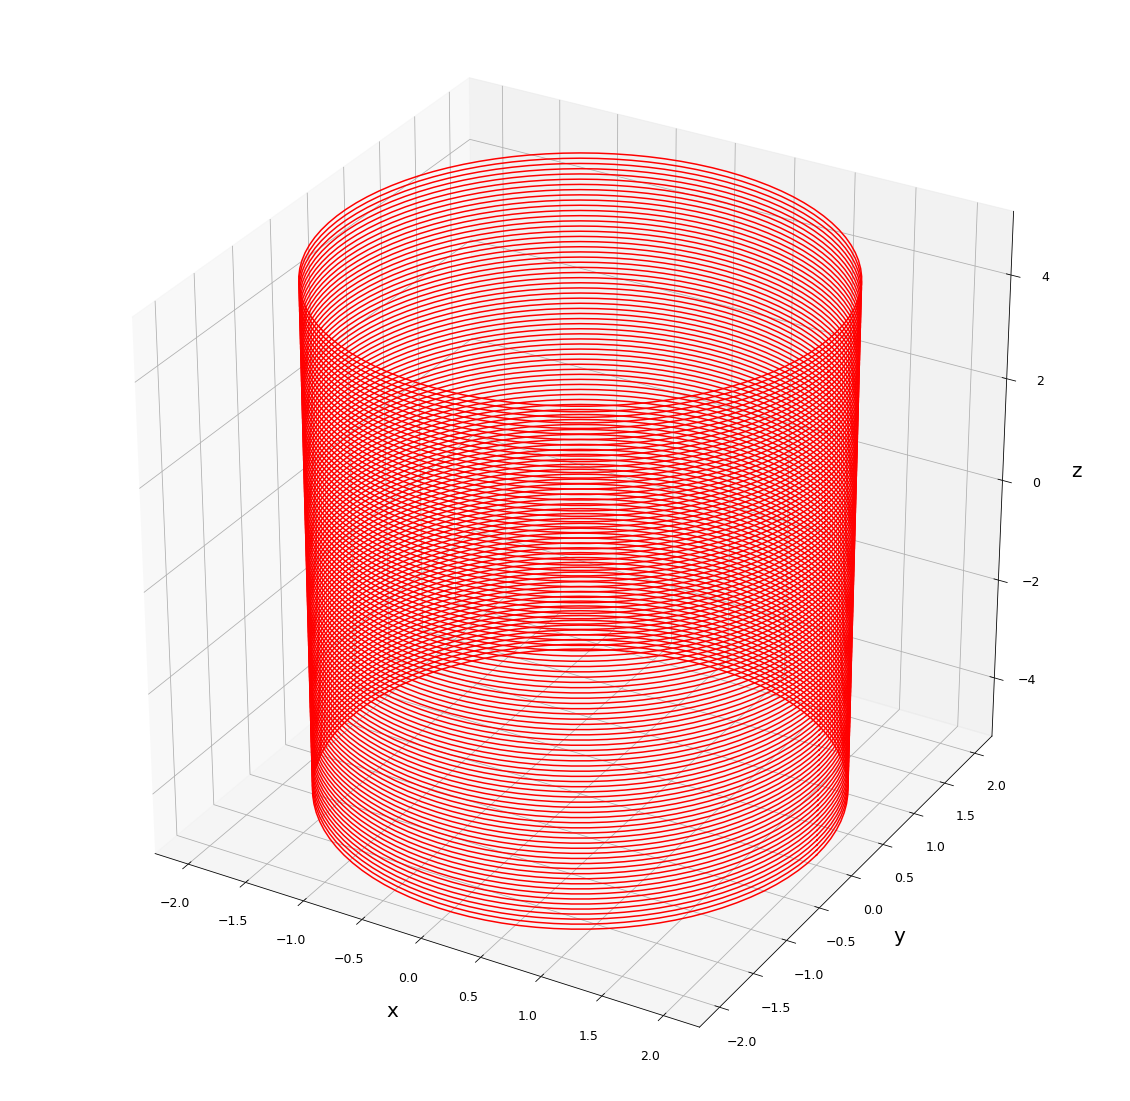

In [ ]:
fig=plt.figure(figsize=(20,20))
ax=fig.gca(projection='3d')
c_x,c_y=cylinder(cyl_rad)
for i in np.linspace(-int(cyl_len/2),int(cyl_len/2),100):
  ax.plot(c_x,c_y,i,color='r')
ax.set_xlabel('x',fontsize=20,labelpad=30)
ax.set_ylabel('y',fontsize=20,labelpad=30)
ax.set_zlabel('z',fontsize=20,labelpad=30)
ax.tick_params(labelsize=12.5,pad=15)